# Module 02 - Part 02

Module 2 is a direct translation from R to Python based on the Advanced R tutorials (AdvanceR_Part2.Rmd) by Shao-Fang Wang in 2020. 

Many people have contributed to developing and revising the R tutorial material (which is what this Python tutorial is based on) over the years: 
Anna Khazenzon, Cayce Hook, Paul Thibodeau, Mike Frank, Benoit Monin, Ewart Thomas, Michael Waskom, Steph Gagnon, Dan Birman, Natalia Velez, Kara Weisman, Andrew Lampinen, Joshua Morris, Yochai Shavit, Jackie Schwartz, Arielle Keller, and Leili Mortazavi.   


### Welcome to part 2!


In [28]:
import numpy
import pandas
import statsmodels.api as sm

In [36]:
df_survey = pandas.read_csv('https://raw.githubusercontent.com/lampinen/R_workshop_materials/master/data/fieldsimul1.csv')

#### Linear regression

T-test works well for the specific case of comparing two-means. For most other analysis we use the function [`sm.OLS`](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html) to perform ordinary least squares. For the sake of this tutorial we will use it to examine the best-fitting linear relationship between quantitative variables (e.g., X and Y). 
To use `sm.OLS`, you must provide X, your *independent variable* (IV), and Y, your *dependent variable* (DV). The shape of X is n * k where n is the number of observations and k is the number of regressors. That is, this formula asked "as X changes, what happens to Y? How much of the variance in Y is explained by variance in X?"




For instance, we might want to investigate the relationship between age (X) and optimism (Y), depicted in the plot above. As age increases, how does optimism change?

In [30]:
#Note that we are now returning to our original dataset (df_survey) 
#because we are no longer interested in just the two parties.
x = sm.add_constant(df_survey['age']) #An intercept is not included by default and should be added by the user
y = df_survey['optmism']
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

#rs2 = lm(optmism ~ age, data = df_survey)

                            OLS Regression Results                            
Dep. Variable:                optmism   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     24.84
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.36e-06
Time:                        16:12:21   Log-Likelihood:                -402.17
No. Observations:                 200   AIC:                             808.3
Df Residuals:                     198   BIC:                             814.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4989      0.444      7.887      0.0

/Users/SFW_Work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Based off of this output, we can see that age is a significant predictor of optimism. Below the table of $t$ values and $p$ values, we can find the "R-squared" statistic of the model. This tells us that the variance in age explains approximately 10% of the variance in optimism.

More complex analyses may include *multiple* predictors, using a technique called *multiple regression*. One common reason to include addition predictors is to "control" for exogenous variables -- variables which are uninteresting in themselves yet related to the relationship we are analyzing. For example, if older people are more likely to belong to one party than another and people in that party tend to more optimistic (perhaps because of party rhetoric or policy stances), then the relationship we observed above may have nothing to do with age. The real relationship could be between party and optimism: it just happens that age and party membership is correlated. Multiple regression helps us tease apart these relationships: we want to know whether age is related to optimism *after accounting for party membership*.  

Because party if a categorical variable, first, we need to convert the party variable into dummy/indicator variables:

In [37]:
df_survey=pandas.concat((df_survey,
                         pandas.get_dummies(df_survey['party'], drop_first=True)), axis=1)
#drop_first: whether to get k-1 dummies out of k categorical levels by removing the first level.
df_survey.head()

,recall,prop54,party,age,optmism,agecat,recallq,2,3
0,1,1,1,49,7,45,1,0,0
1,1,1,1,44,8,45,1,0,0
2,1,1,1,46,7,45,1,0,0
3,1,1,1,50,7,45,1,0,0
4,1,1,1,25,6,24,1,0,0


This results in a column of dummy code for party 2 and a column of dummy code for party 3. The names of the columns are a bit confusing, let's change the names:

In [38]:
df_survey = df_survey.rename(columns={2: "party2", 3: "party3"})
df_survey.head()

,recall,prop54,party,age,optmism,agecat,recallq,party2,party3
0,1,1,1,49,7,45,1,0,0
1,1,1,1,44,8,45,1,0,0
2,1,1,1,46,7,45,1,0,0
3,1,1,1,50,7,45,1,0,0
4,1,1,1,25,6,24,1,0,0


Now, we are ready to add party (i.e., party2 and party 3) as another regressor to the model in addition to age.

In [20]:
x2 = df_survey.filter(items=['party2','party3','age'])
x2 = sm.add_constant(x2)#An intercept is not included by default and should be added by the user
y = df_survey['optmism']
model = sm.OLS(y,x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                optmism   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     27.45
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.25e-15
Time:                        16:01:09   Log-Likelihood:                -378.91
No. Observations:                 200   AIC:                             765.8
Df Residuals:                     196   BIC:                             779.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4666      0.423     10.562      0.0

*Don't worry yet about understanding every line of this output*: it's complicated and we will likely spend some time understanding it. If you feel like you do not have sufficient understanding- feel free to contact the course TA's or the departmental stats TA's (as of Autumn quarte 2017 - Erin Bennett & Yochai Shavit).

In the meantime, let's focus on two particularly interesting properties of these results. First, looking at the table with $t$ and $p$ values, we see that *age* is still highly significant as a predictor even after controlling for party membership. Second, looking at the "R-squared" statistic, we see that it's gone up to about 0.30. Just by including "party" as a predictor, we were able to go from explaining about 10% of the variance in optimism to explaining 30% of the variance! Intuitively, this appears to be a "better" model.

Returning to the simple linear regression (with a single predictor), we can ask `seaborn` to reconstruct it from the aesthetics object and plot it on top of the data:


In [39]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn

<Figure size 576x576 with 0 Axes>

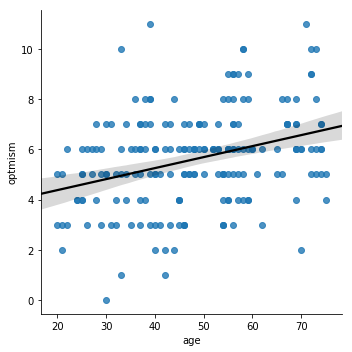

In [40]:
plt.figure(figsize=(8,8))
ax = seaborn.lmplot(x='age',
                    y='optmism',
                    line_kws={'color': 'black'},#change the color of the line
                    data=df_survey)

Note that if you want to really understand what's happening in these plots, it can be valuable to plot these by hand, for example here is some code to plot the residuals (.resid) in `seaborn`:

In [58]:
plt.figure(figsize=(8,8))
residual = pandas.DataFrame({'age':df_survey['age'],'resi':result.resid})
#you can access the results from the model os
residual.head()

<Figure size 576x576 with 0 Axes>

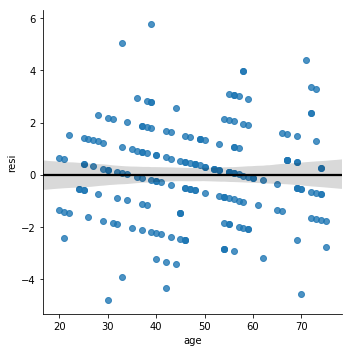

In [60]:
ax = seaborn.lmplot(x='age',
                    y='resi',
                    line_kws={'color': 'black'},#change the color of the line
                    data=residual)

## Resources
To understand the result class of a fitted mdoel: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html?highlight=regressionresults